# 丢弃法简洁实现

In [1]:
import torch
from torch import nn
import d2l.torch as d2l

In [2]:
batch_size, learning_rate, dropout1, dropout2 = 256, 0.5, 0.2, 0.5
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

在设置层数大小的时候, 层数使用更多的单元, 更高的 dropout 可能效果会比使用小一点的单元效果更加好

In [3]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256), nn.ReLU(),
    nn.Dropout(dropout1),
    nn.Linear(256,256), nn.ReLU(),
    nn.Dropout(dropout2),
    nn.Linear(256,10)
)

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

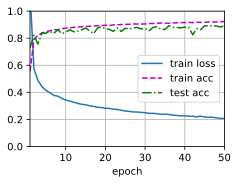

In [4]:
trainer = torch.optim.SGD(net.parameters(), lr=learning_rate)
loss = nn.CrossEntropyLoss(reduction='none')
num_epochs = 50
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer, ylim=[0, 1.0])